In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import ElasticNet, LinearRegression, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Importing the data

In [2]:
train = pd.read_csv('./datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
test = pd.read_csv('./datasets/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
train.shape

(2051, 81)

In [5]:
test.shape

(879, 80)

In [6]:
set(train.columns) - set(test.columns)

{'SalePrice'}

In [7]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [8]:
test['SalePrice'] = 0

In [9]:
test.shape

(879, 81)

## Concatenating the Train and Test data sets

In [10]:
df = pd.concat([train, test], ignore_index=True)
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [11]:
df.shape

(2930, 81)

In [12]:
df.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2925,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,0
2926,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,0
2927,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,0
2928,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,0
2929,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,3,2007,WD,0


In [13]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

## Data Cleaning

In [14]:
# Number of null items in each column
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum().sort_values(ascending=False)

PoolQC          2917
MiscFeature     2824
Alley           2732
Fence           2358
FireplaceQu     1422
LotFrontage      490
GarageYrBlt      159
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      83
BsmtFinType2      81
BsmtCond          80
BsmtQual          80
BsmtFinType1      80
MasVnrType        23
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Electrical         1
dtype: int64

In [15]:
# Handle missing values for some of the features

# Alley : data description says NA means 'no alley access'
df['Alley'].fillna('NA', inplace=True)

# BsmtQual etc : data description says NA for basement features is 'no basement'
df['BsmtQual'].fillna('NA', inplace=True)  
df['BsmtCond'].fillna('NA', inplace=True)
df['BsmtExposure'].fillna('NA', inplace=True)
df['BsmtFinType1'].fillna('NA', inplace=True)
df['BsmtFinType2'].fillna('NA', inplace=True)
df['BsmtFullBath'].fillna(0, inplace=True)
df['BsmtHalfBath'].fillna(0, inplace=True)
df['BsmtUnfSF'].fillna(0, inplace=True)
df['TotalBsmtSF'].fillna(0, inplace=True)
df['BsmtFinSF1'].fillna(0, inplace=True)
df['BsmtFinSF2'].fillna(0, inplace=True)

# Fence : data description says NA means 'no fence'
df['Fence'].fillna('NA', inplace=True)

# FireplaceQu : data description says NA means 'no fireplace'
df['FireplaceQu'].fillna('NA', inplace=True)

# GarageType etc : data description says NA for garage features is 'no garage'
df['GarageType'].fillna('NA', inplace=True)
df['GarageFinish'].fillna('NA', inplace=True)
df['GarageQual'].fillna('NA', inplace=True)
df['GarageCond'].fillna('NA', inplace=True)
df['GarageArea'].fillna(0, inplace=True)
df['GarageCars'].fillna(0, inplace=True)
Garage_Median = df['GarageYrBlt'].median()
df['GarageYrBlt'].fillna(Garage_Median, inplace=True)

# LotFrontage : NA most likely means no lot frontage
df['LotFrontage'].fillna(0, inplace=True)

# MasVnrType : NA most likely means no veneer
df['MasVnrType'].fillna('NA', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

# MiscFeature : data description says NA means 'no misc feature'
df['MiscFeature'].fillna('NA', inplace=True)

# PoolQC : data description says NA means 'no pool'
df['PoolQC'].fillna('NA', inplace=True)

# Electrical : NA most likely means Standard Circuit
df['Electrical'].fillna('SBrkr', inplace=True)


In [16]:
df.isnull().sum().sum()

0

In [17]:
df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     192
30      139
160     129
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [18]:
# Some numerical features are actually really categories

df['MSSubClass'] = df['MSSubClass'].replace({20 : 'SC20', 30 : 'SC30', 40 : 'SC40', 45 : 'SC45', 
                          50 : 'SC50', 60 : 'SC60', 70 : 'SC70', 75 : 'SC75', 
                          80 : 'SC80', 85 : 'SC85', 90 : 'SC90', 120 : 'SC120', 
                          150 : 'SC150', 160 : 'SC160', 180 : 'SC180', 190 : 'SC190'})

In [19]:
df['MoSold'] = df['MoSold'].replace({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun',
                                     7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})

In [20]:
# Encode ordinal categorical features as ordered numbers when there is information in the order

df['Alley'] = df['Alley'].replace({'NA' : 0, 'Grvl' : 1, 'Pave' : 2})
df['BsmtCond'] = df['BsmtCond'].replace({'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
df['BsmtExposure'] = df['BsmtExposure'].replace({'NA' : 0, 'No' : 0, 'Mn' : 1, 'Av': 2, 'Gd' : 3})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({'NA' : 0, 'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4, 
                                                 'ALQ' : 5, 'GLQ' : 6})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({'NA' : 0, 'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4, 
                                                 'ALQ' : 5, 'GLQ' : 6})
df['BsmtQual'] = df['BsmtQual'].replace({'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5})
df['CentralAir'] = df['CentralAir'].replace({'N' : 0, 'Y' : 1})
df['ExterCond'] = df['ExterCond'].replace({'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd': 4, 'Ex' : 5})
df['ExterQual'] = df['ExterQual'].replace({'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd': 4, 'Ex' : 5})
df['Electrical'] = df['Electrical'].replace({'Mix' : 0, 'FuseP' : 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr' : 4})
df['Fence'] = df['Fence'].replace({'NA' : 0, 'MnWw' : 1, 'MnPrv' : 1, 'GdWo' : 2, 'GdPrv' : 2})
df['FireplaceQu'] = df['FireplaceQu'].replace({'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
df['Functional'] = df['Functional'].replace({'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod': 5, 
                                             'Min2' : 6, 'Min1' : 7, 'Typ' : 8})
df['GarageCond'] = df['GarageCond'].replace({'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
df['GarageFinish'] = df['GarageFinish'].replace({'NA' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3})
df['GarageQual'] = df['GarageQual'].replace({'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
df['HeatingQC'] = df['HeatingQC'].replace({'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
df['KitchenQual'] = df['KitchenQual'].replace({'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
df['LandSlope'] = df['LandSlope'].replace({'Sev' : 1, 'Mod' : 2, 'Gtl' : 3})
df['LotShape'] = df['LotShape'].replace({'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4})
df['PavedDrive'] = df['PavedDrive'].replace({'N' : 0, 'P' : 1, 'Y' : 2})
df['PoolQC'] = df['PoolQC'].replace({'NA' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})
df['Street'] = df['Street'].replace({'Grvl' : 1, 'Pave' : 2})
df['Utilities'] = df['Utilities'].replace({'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4})


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
LotFrontage,2930.0,5.764778e+01,3.349944e+01,0.0,4.300000e+01,63.0,7.800000e+01,3.130000e+02
LotArea,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Street,2930.0,1.995904e+00,6.387630e-02,1.0,2.000000e+00,2.0,2.000000e+00,2.000000e+00
Alley,2930.0,9.419795e-02,3.723095e-01,0.0,0.000000e+00,0.0,0.000000e+00,2.000000e+00
LotShape,2930.0,3.597611e+00,5.702848e-01,1.0,3.000000e+00,4.0,4.000000e+00,4.000000e+00
Utilities,2930.0,3.998635e+00,4.523954e-02,2.0,4.000000e+00,4.0,4.000000e+00,4.000000e+00
LandSlope,2930.0,2.946416e+00,2.483042e-01,1.0,3.000000e+00,3.0,3.000000e+00,3.000000e+00
OverallQual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01


## Splitting train and test data sets

In [22]:
train = df.iloc[:ntrain]
test = df.iloc[ntrain:]
train.shape

(2051, 81)

## EDA through Visualization 

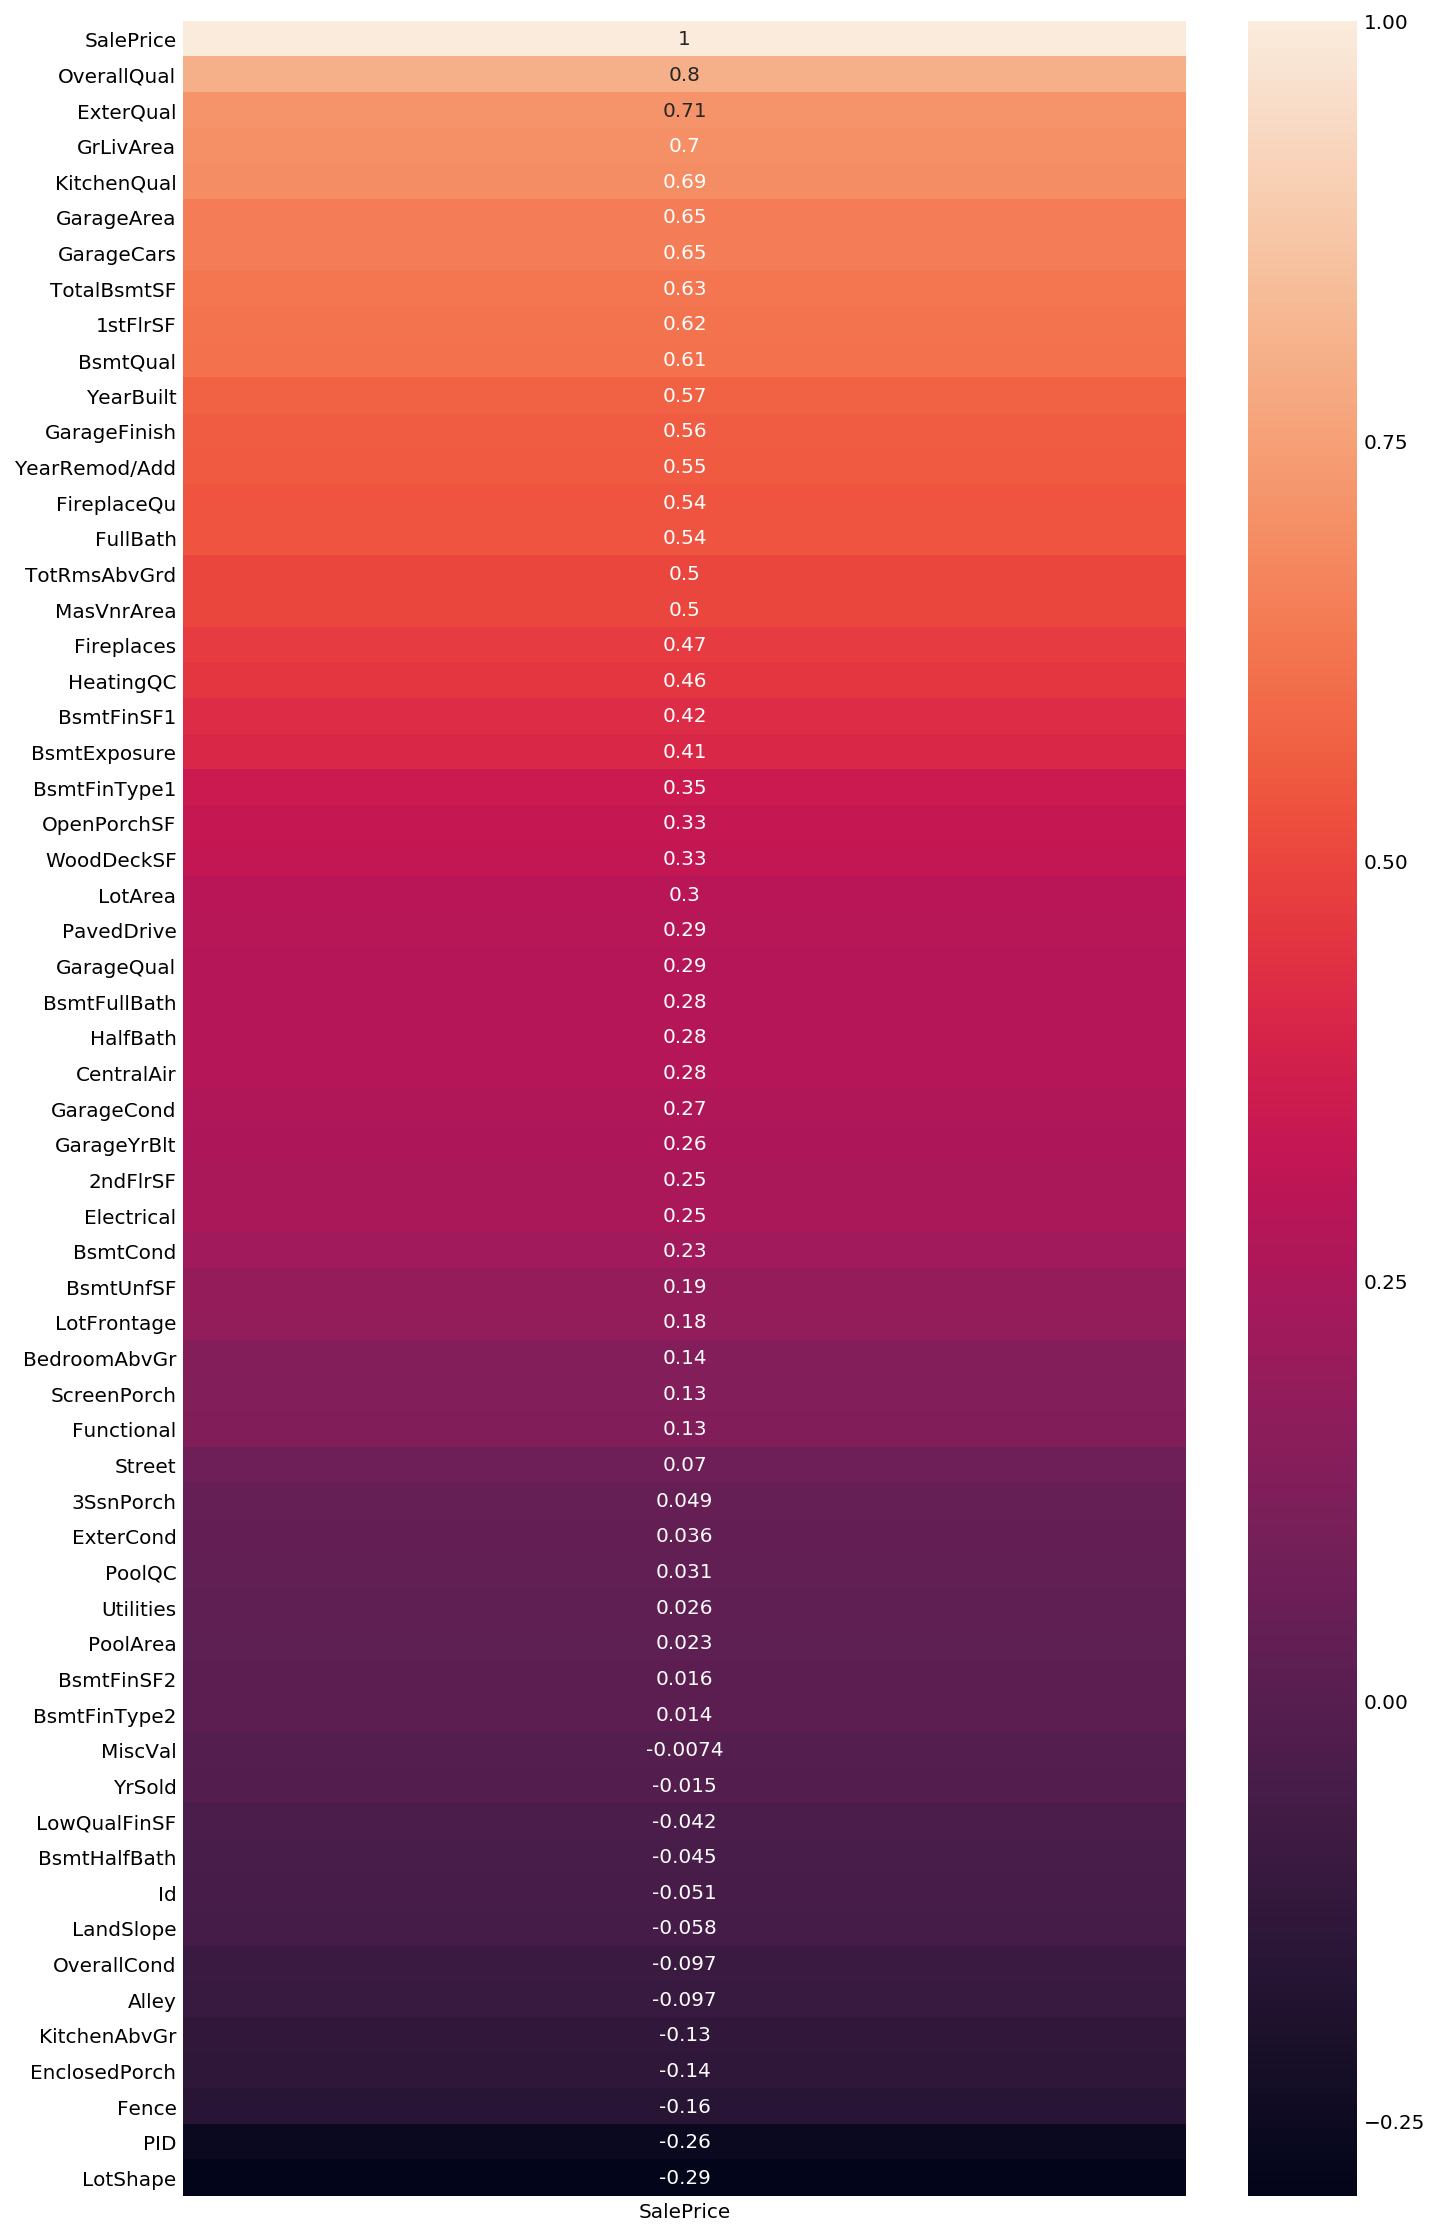

In [23]:
plt.figure(figsize=(10,20))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True);

In [24]:
# obtaining 10 features mostly correlated with the sale price
most_correlated = train.corr()['SalePrice'].abs().sort_values(ascending=False)[1:11]
most_correlated = most_correlated.index.tolist()
print(*most_correlated, sep='\n')

OverallQual
ExterQual
GrLivArea
KitchenQual
GarageArea
GarageCars
TotalBsmtSF
1stFlrSF
BsmtQual
YearBuilt


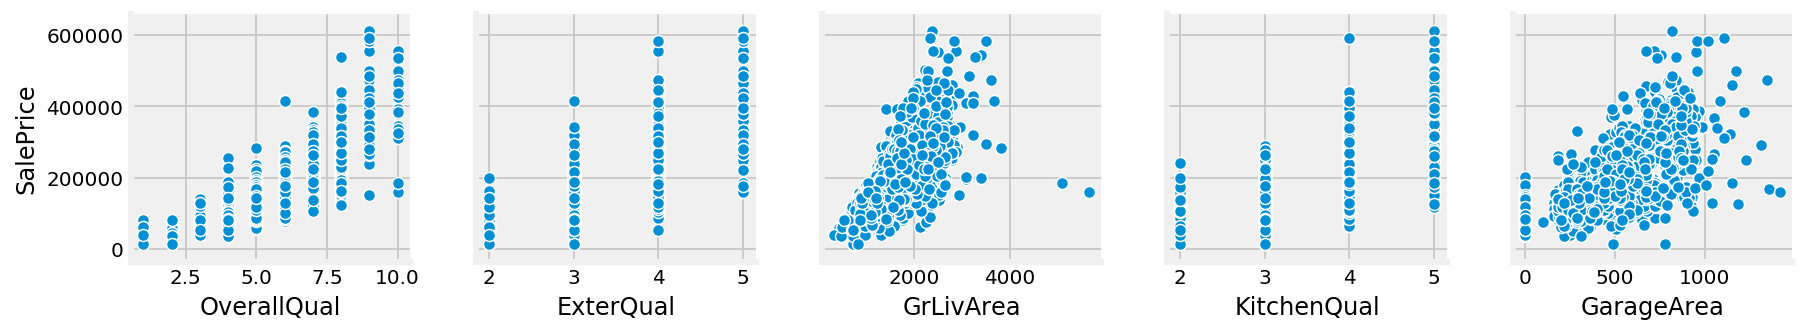

In [25]:
sns.pairplot(train, y_vars=['SalePrice'], x_vars=most_correlated[0:5]);

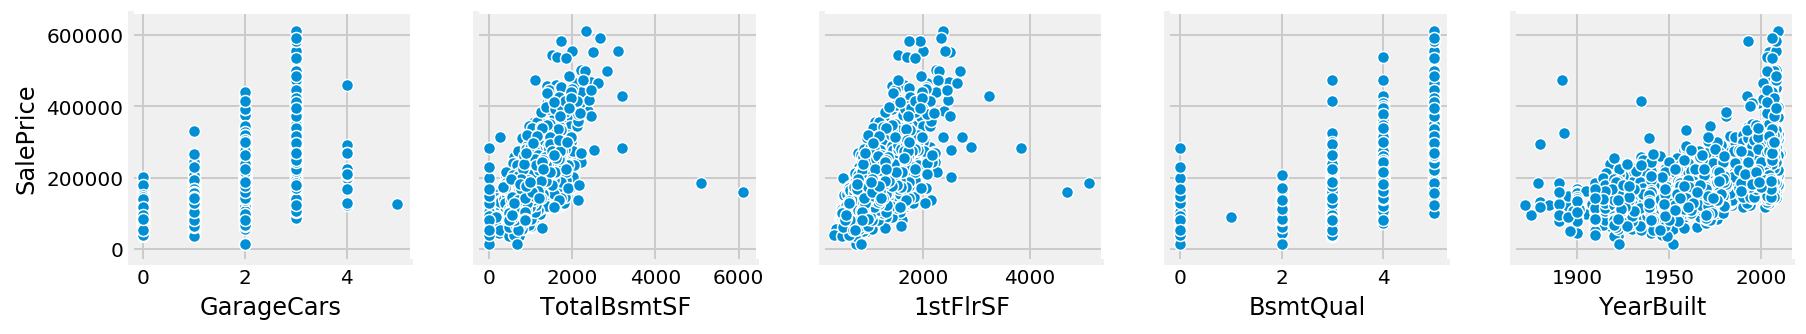

In [26]:
sns.pairplot(train, y_vars=['SalePrice'], x_vars=most_correlated[5:10]);

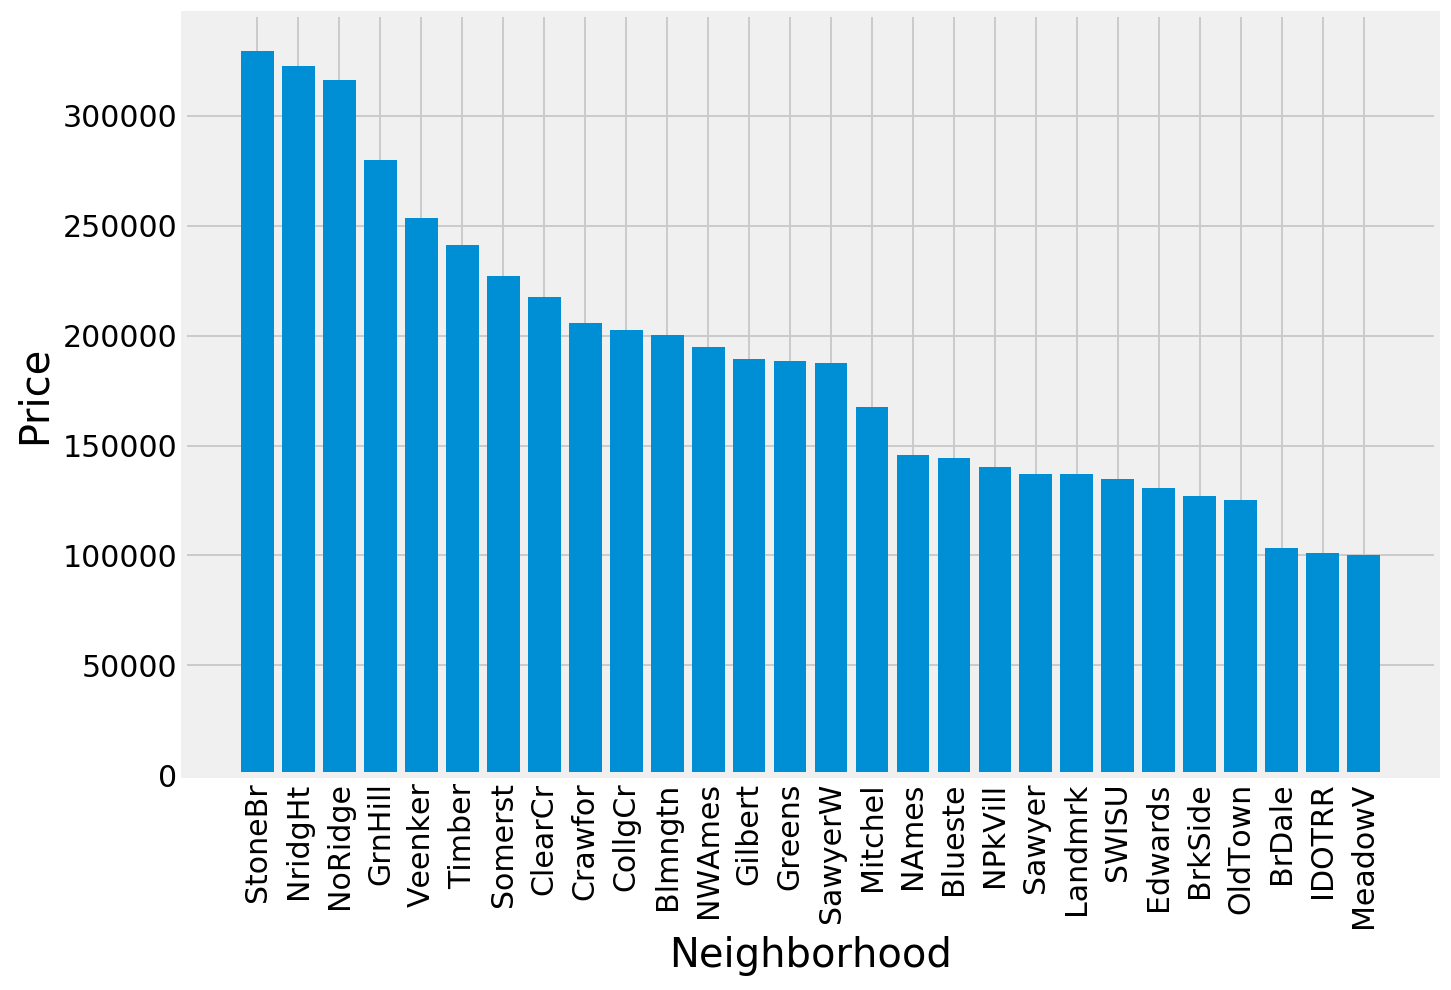

In [27]:
grouped = train.groupby('Neighborhood').mean().sort_values(by='SalePrice', ascending=False).reset_index()

plt.figure(figsize=(10,7))
plt.bar(grouped['Neighborhood'], grouped['SalePrice'])
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Price', fontsize=20);

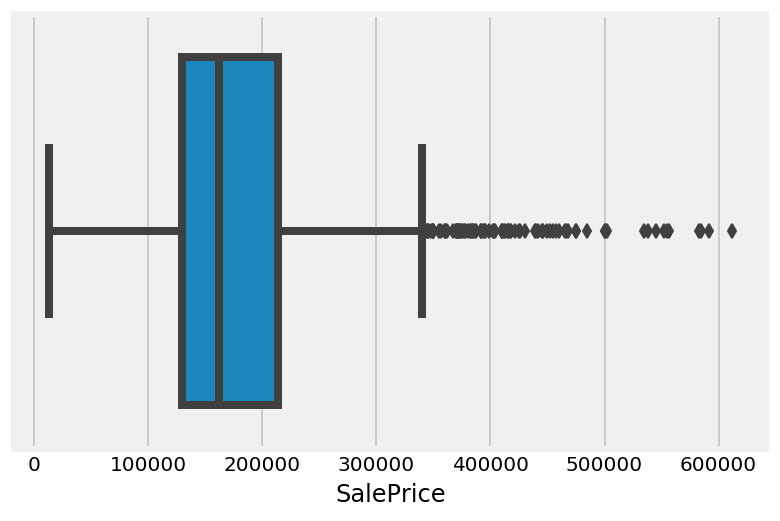

In [28]:
sns.boxplot(train['SalePrice']);

## Feature Engineering

In [29]:
numerical_columns = df._get_numeric_data().columns
numerical_columns

Index(['Id', 'PID', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'YrSold',
       'SalePrice'],
      dtype='object')

In [30]:
# These numerical columns don't seem to affect the sale price
excluded_numerical_columns = ['Id', 'PID', 'YrSold']

In [31]:
categorical_columns = set(df.columns) - set(numerical_columns)
categorical_columns

{'BldgType',
 'Condition1',
 'Condition2',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LotConfig',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'MoSold',
 'Neighborhood',
 'RoofMatl',
 'RoofStyle',
 'SaleType'}

In [32]:
# The month of sale doesn't seem to affect the sale price
excluded_categorical_columns = ['MoSold']

In [33]:
included_categorical_columns = list(set(categorical_columns) - set(excluded_categorical_columns))
included_categorical_columns

['MiscFeature',
 'BldgType',
 'Exterior1st',
 'SaleType',
 'Condition2',
 'Exterior2nd',
 'HouseStyle',
 'MasVnrType',
 'Neighborhood',
 'LotConfig',
 'GarageType',
 'RoofMatl',
 'Foundation',
 'LandContour',
 'Heating',
 'Condition1',
 'MSSubClass',
 'RoofStyle',
 'MSZoning']

In [34]:
df = pd.get_dummies(df, columns=included_categorical_columns, drop_first=True)
df.head()

,Id,PID,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,...,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM
0,109,533352170,0.0,13517,2,0,3,4,3,6,...,0,0,0,0,0,0,0,0,1,0
1,544,531379050,43.0,11492,2,0,3,4,3,7,...,0,0,0,0,0,0,0,0,1,0
2,153,535304180,68.0,7922,2,0,4,4,3,5,...,0,0,0,0,0,0,0,0,1,0
3,318,916386060,73.0,9802,2,0,4,4,3,5,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,82.0,14235,2,0,3,4,3,6,...,0,0,0,0,0,0,0,0,1,0


In [35]:
train = df.iloc[:ntrain]
test = df.iloc[ntrain:]
train.shape

(2051, 221)

## Introducing Polynomial Features

In [36]:
numerical_columns = train._get_numeric_data().columns

In [37]:
included_numerical_columns = list(set(numerical_columns) - set(excluded_numerical_columns))

In [38]:
# obtaining 40 features mostly correlated with the sale price (including dummy features)
most_correlated = train[included_numerical_columns].corr()['SalePrice'].abs().sort_values(ascending=False)[1:41]
most_correlated = most_correlated.index.tolist()
print(*most_correlated, sep='\n')

OverallQual
ExterQual
GrLivArea
KitchenQual
GarageArea
GarageCars
TotalBsmtSF
1stFlrSF
BsmtQual
YearBuilt
GarageFinish
YearRemod/Add
FireplaceQu
FullBath
Foundation_PConc
TotRmsAbvGrd
MasVnrArea
Fireplaces
HeatingQC
Neighborhood_NridgHt
MasVnrType_None
BsmtFinSF1
BsmtExposure
GarageType_Detchd
SaleType_New
GarageType_Attchd
Foundation_CBlock
MSSubClass_SC60
BsmtFinType1
Exterior1st_VinylSd
Exterior2nd_VinylSd
OpenPorchSF
WoodDeckSF
MasVnrType_Stone
LotArea
LotShape
PavedDrive
GarageQual
BsmtFullBath
HalfBath


In [39]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(df[most_correlated])

In [40]:
X_poly.shape

(2930, 860)

In [41]:
poly_col_names = poly.get_feature_names(most_correlated)
df_poly = pd.DataFrame(X_poly, columns=poly_col_names)
df_poly.head()

,OverallQual,ExterQual,GrLivArea,KitchenQual,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF,BsmtQual,YearBuilt,...,PavedDrive^2,PavedDrive GarageQual,PavedDrive BsmtFullBath,PavedDrive HalfBath,GarageQual^2,GarageQual BsmtFullBath,GarageQual HalfBath,BsmtFullBath^2,BsmtFullBath HalfBath,HalfBath^2
0,6.0,4.0,1479.0,4.0,475.0,2.0,725.0,725.0,3.0,1976.0,...,4.0,6.0,0.0,2.0,9.0,0.0,3.0,0.0,0.0,1.0
1,7.0,4.0,2122.0,4.0,559.0,2.0,913.0,913.0,4.0,1996.0,...,4.0,6.0,2.0,2.0,9.0,3.0,3.0,1.0,1.0,1.0
2,5.0,3.0,1057.0,4.0,246.0,1.0,1057.0,1057.0,3.0,1953.0,...,4.0,6.0,2.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0
3,5.0,3.0,1444.0,3.0,400.0,2.0,384.0,744.0,4.0,2006.0,...,4.0,6.0,0.0,2.0,9.0,0.0,3.0,0.0,0.0,1.0
4,6.0,3.0,1445.0,3.0,484.0,2.0,676.0,831.0,2.0,1900.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_poly.drop(most_correlated, axis=1, inplace=True)
df_poly.head()

,OverallQual^2,OverallQual ExterQual,OverallQual GrLivArea,OverallQual KitchenQual,OverallQual GarageArea,OverallQual GarageCars,OverallQual TotalBsmtSF,OverallQual 1stFlrSF,OverallQual BsmtQual,OverallQual YearBuilt,...,PavedDrive^2,PavedDrive GarageQual,PavedDrive BsmtFullBath,PavedDrive HalfBath,GarageQual^2,GarageQual BsmtFullBath,GarageQual HalfBath,BsmtFullBath^2,BsmtFullBath HalfBath,HalfBath^2
0,36.0,24.0,8874.0,24.0,2850.0,12.0,4350.0,4350.0,18.0,11856.0,...,4.0,6.0,0.0,2.0,9.0,0.0,3.0,0.0,0.0,1.0
1,49.0,28.0,14854.0,28.0,3913.0,14.0,6391.0,6391.0,28.0,13972.0,...,4.0,6.0,2.0,2.0,9.0,3.0,3.0,1.0,1.0,1.0
2,25.0,15.0,5285.0,20.0,1230.0,5.0,5285.0,5285.0,15.0,9765.0,...,4.0,6.0,2.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0
3,25.0,15.0,7220.0,15.0,2000.0,10.0,1920.0,3720.0,20.0,10030.0,...,4.0,6.0,0.0,2.0,9.0,0.0,3.0,0.0,0.0,1.0
4,36.0,18.0,8670.0,18.0,2904.0,12.0,4056.0,4986.0,12.0,11400.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_all = pd.concat([df, df_poly], axis=1)
df_all.head()

,Id,PID,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,...,PavedDrive^2,PavedDrive GarageQual,PavedDrive BsmtFullBath,PavedDrive HalfBath,GarageQual^2,GarageQual BsmtFullBath,GarageQual HalfBath,BsmtFullBath^2,BsmtFullBath HalfBath,HalfBath^2
0,109,533352170,0.0,13517,2,0,3,4,3,6,...,4.0,6.0,0.0,2.0,9.0,0.0,3.0,0.0,0.0,1.0
1,544,531379050,43.0,11492,2,0,3,4,3,7,...,4.0,6.0,2.0,2.0,9.0,3.0,3.0,1.0,1.0,1.0
2,153,535304180,68.0,7922,2,0,4,4,3,5,...,4.0,6.0,2.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0
3,318,916386060,73.0,9802,2,0,4,4,3,5,...,4.0,6.0,0.0,2.0,9.0,0.0,3.0,0.0,0.0,1.0
4,255,906425045,82.0,14235,2,0,3,4,3,6,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


## Splitting train and test data sets

In [44]:
train = df_all.iloc[:ntrain]
test = df_all.iloc[ntrain:]
train.shape

(2051, 1041)

## Selection of features

In [45]:
numerical_columns = train._get_numeric_data().columns

In [46]:
included_numerical_columns = list(set(numerical_columns) - set(excluded_numerical_columns))

In [47]:
features = [col for col in included_numerical_columns if col != 'SalePrice']
X = train[features]
y = train['SalePrice']

## Trying Log Transformation

In [48]:
y_log = np.log(y)

## Train/Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state=42)

## Scaling the data

In [50]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

## Elastic Net

In [51]:
l1_ratios = [.001, .01, .1, .5, .7, .9, .95, .99, 1]
elastic = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=1000, max_iter=50000)

In [52]:
elastic.fit(X_train_sc, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
       max_iter=50000, n_alphas=1000, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [53]:
elastic_optimal_alpha = elastic.alpha_
elastic_optimal_alpha

0.09789555303983166

In [54]:
elastic_optimal_l1_ratio = elastic.l1_ratio_
elastic_optimal_l1_ratio

0.01

In [55]:
elastic_opt = ElasticNet(alpha=elastic_optimal_alpha, l1_ratio=elastic_optimal_l1_ratio, max_iter=50000)

In [56]:
elastic_opt.fit(X_train_sc, y_train)

ElasticNet(alpha=0.09789555303983166, copy_X=True, fit_intercept=True,
      l1_ratio=0.01, max_iter=50000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

## Checking the Coefficients

ElasticNet picked 446 features and eliminated the other 590 features.


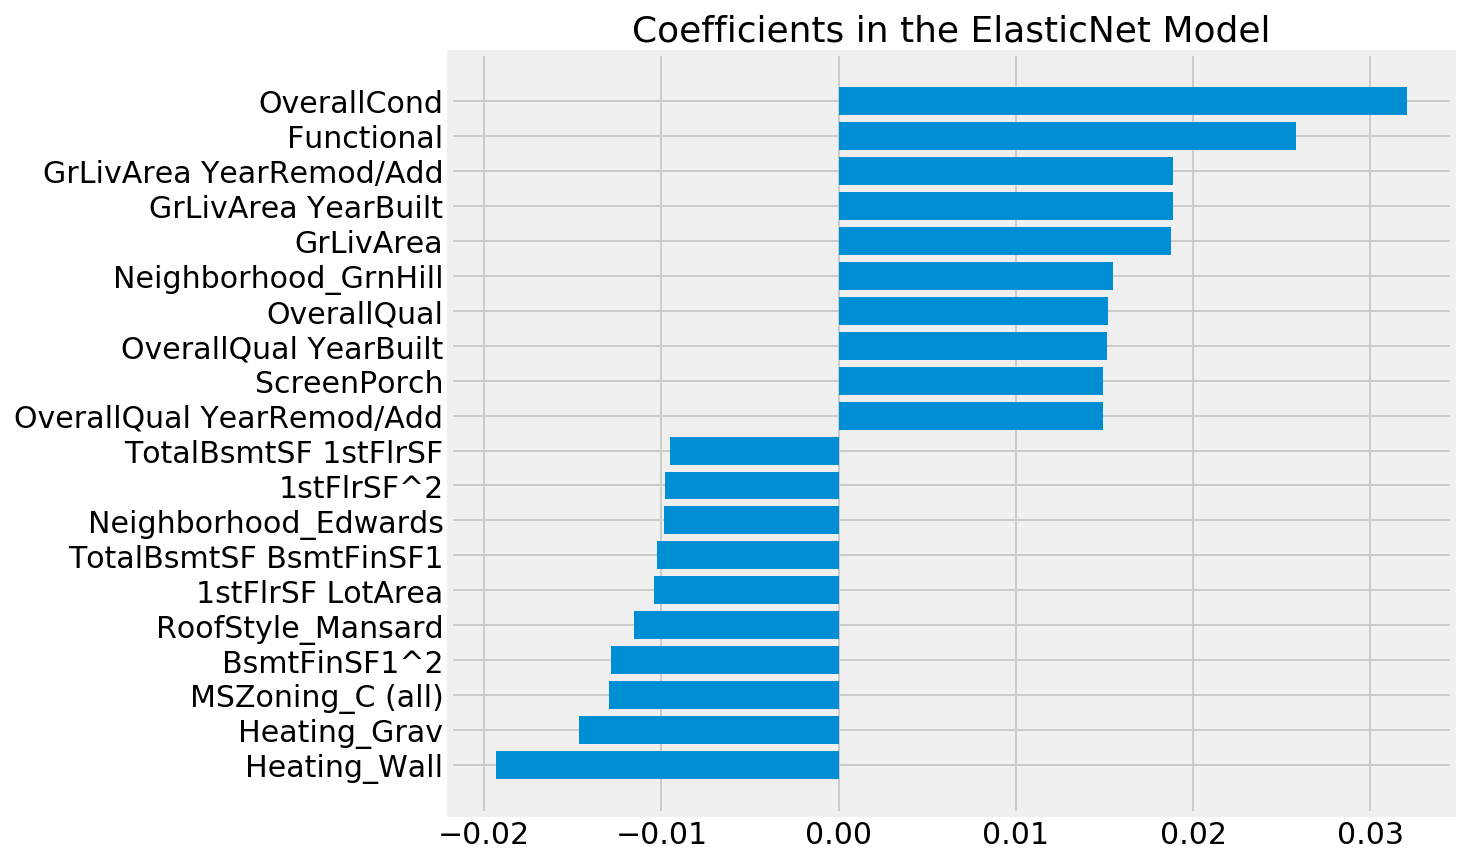

In [57]:
coefficients = pd.Series(elastic_opt.coef_, index = X_train.columns)

print('ElasticNet picked ' + str(sum(coefficients != 0)) + \
      ' features and eliminated the other ' +  str(sum(coefficients == 0)) + ' features.')

imp_coefs = pd.concat([coefficients.sort_values().head(10),
                       coefficients.sort_values().tail(10)])

plt.figure(figsize=(8, 7))
plt.barh(imp_coefs.index, imp_coefs.values)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Coefficients in the ElasticNet Model', fontsize=18);

## Evaluating Scores

In [58]:
elastic_opt.score(X_train_sc, y_train)

0.9474874523036584

In [59]:
elastic_opt.score(X_test_sc, y_test)

0.8859324001596911

In [60]:
cross_val_score(elastic_opt, X_train_sc, y_train, cv=5).mean()

0.9030359892236509

In [61]:
preds_train = elastic_opt.predict(X_train_sc)
preds_test = elastic_opt.predict(X_test_sc)

residuals_train = y_train - preds_train
residuals_test = y_test - preds_test

r2_score(y_test, preds_test)

0.8859324001596911

## Checking the normality of residuals 

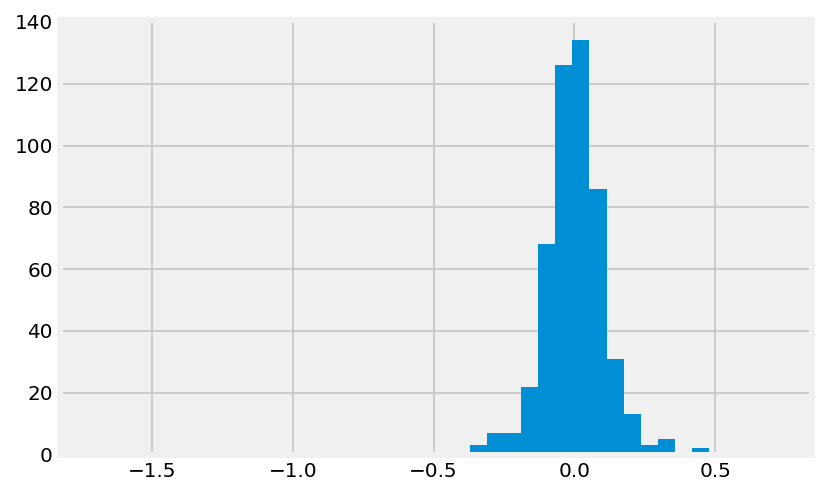

In [62]:
residuals_test.hist(bins=40);

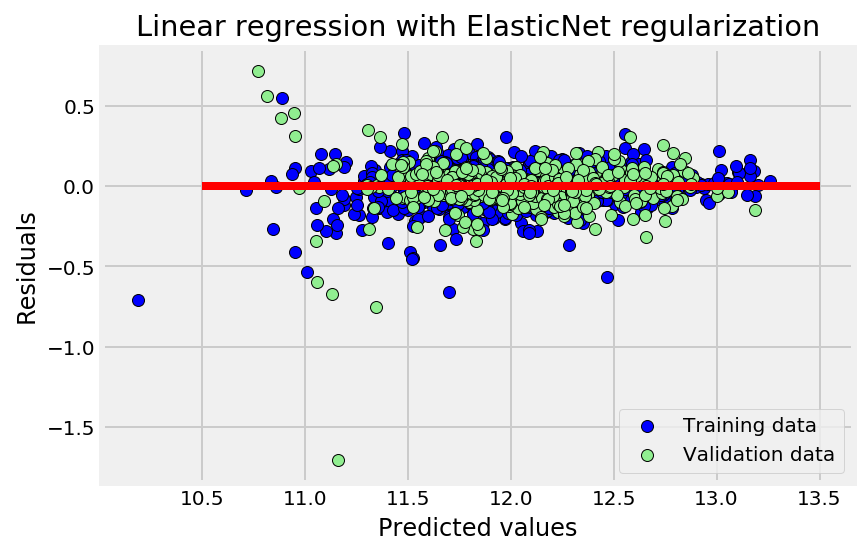

In [63]:
# Plot residuals
plt.scatter(preds_train, residuals_train, c='blue', marker='o', label='Training data', edgecolors='black')
plt.scatter(preds_test, residuals_test, c ='lightgreen', marker='o', label='Validation data', edgecolors='black')
plt.title('Linear regression with ElasticNet regularization')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'lower right')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = 'red');

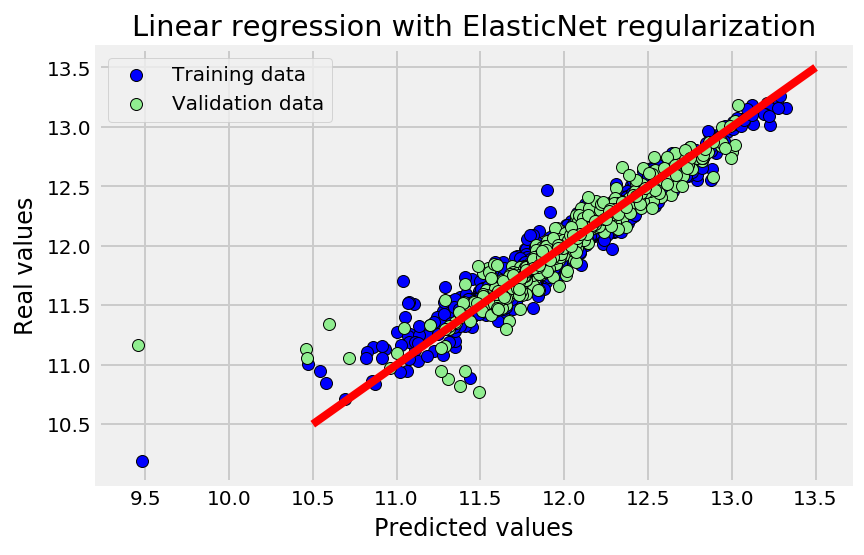

In [64]:
# Plot predictions
plt.scatter(y_train, preds_train, c='blue', marker='o', label='Training data', edgecolors='black')
plt.scatter(y_test, preds_test, c ='lightgreen', marker='o', label='Validation data', edgecolors='black')
plt.title('Linear regression with ElasticNet regularization')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.legend(loc = 'upper left')
plt.plot([10.5, 13.5], [10.5, 13.5], c = 'red');

## Predicting the Price for the Test Set

In [65]:
XX = test[features]

In [66]:
XX_sc = ss.transform(XX)

In [67]:
preds = elastic_opt.predict(XX_sc)

In [68]:
# df_output = pd.DataFrame({'Id': test['Id'].values, 'SalePrice': preds})
df_output = pd.DataFrame({'Id': test['Id'].values, 'SalePrice': np.exp(preds)})
df_output.head()

,Id,SalePrice
0,2658,131887.163102
1,2718,157758.558171
2,2414,224223.965607
3,1989,99007.858073
4,625,174145.181014


In [69]:
df_output.to_csv('./datasets/submission.csv', index=False)